Adapted from 
Edureka
https://www.edureka.co/ai-deep-learning-with-tensorflow

In [1]:
import numpy as np

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [3]:
import matplotlib.pyplot as plt

The size of the encoded representations

In [4]:
encoding_dim = 384 # 384 floats -> compression of factor 8, assuming the input is 3072 floats

The input placeholder

In [5]:
input_img = Input(shape=(3072,))

"encoded" is the encoded representation of the input

In [6]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

"decoded" is the lossy reconstruction of the input

In [7]:
decoded = Dense(3072, activation='sigmoid')(encoded)

This model maps an input to its reconstruction

In [8]:
autoencoder = Model(input_img, decoded)

This model maps an input to its encoded representation

In [9]:
encoder = Model(input_img, encoded)

Create a placeholder for an encoded (32 dimensional) input

In [10]:
encoded_input = Input(shape=(encoding_dim,))

Retreive the last layer of the autoencoder model

In [11]:
decoder_layer = autoencoder.layers[-1]

Create the decoder model

In [12]:
decoder = Model(encoded_input, decoder_layer(encoded_input))

Configure our model to use a per-pixel binary crossentropy loss

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Prepare our input data. We're using CIFAR 10 images and we're discarding the labels

In [14]:
(x_train, _), (x_test, _) = cifar10.load_data()

Normalize all values between 0 and 1 and we will flatten the 384x384x3 imagesinto vectors of size 3072

In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [16]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [17]:
print(x_train.shape)

(50000, 3072)


In [18]:
print(x_test.shape)

(10000, 3072)


Train autoencoder for 50 epochs

In [19]:
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 203us/sample - loss: 0.6309 - val_loss: 0.6137
Epoch 2/50
50000/50000 [==============================] - 10s 194us/sample - loss: 0.6035 - val_loss: 0.5981
Epoch 3/50
50000/50000 [==============================] - 10s 202us/sample - loss: 0.5940 - val_loss: 0.5908
Epoch 4/50
50000/50000 [==============================] - 10s 203us/sample - loss: 0.5890 - val_loss: 0.5990
Epoch 5/50
50000/50000 [==============================] - 11s 210us/sample - loss: 0.5855 - val_loss: 0.5827
Epoch 6/50
50000/50000 [==============================] - 11s 219us/sample - loss: 0.5824 - val_loss: 0.5810
Epoch 7/50
50000/50000 [==============================] - 9s 179us/sample - loss: 0.5795 - val_loss: 0.5814
Epoch 8/50
50000/50000 [==============================] - 8s 159us/sample - loss: 0.5780 - val_loss: 0.5772
Epoch 9/50
50000/50000 [==============================] - 8s 168us/sample - loss

Encode and decode some images.

Note that we take them from the *test* set

In [20]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Visualize the reconstructed inputs and the encoded representation.

In [21]:
n = 20 # how many images we will display

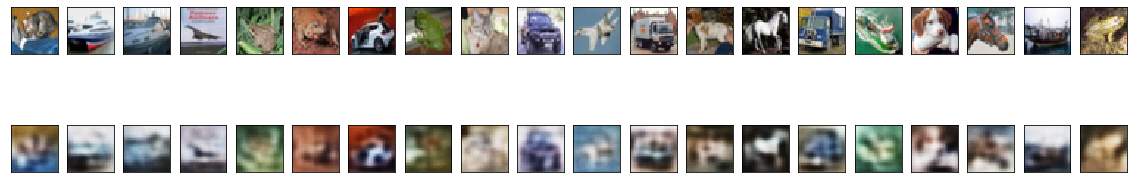

In [22]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()